# Data Visualization

### import modules

In [162]:
import csv
import re
from numpy import array
import cpplotter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from statistics import mean
from numpy import nan

### import functions

In [163]:
from cpcsc import get_node_count
from cpplotter import *

### import data

In [164]:
data=pd.read_csv("data.csv")

### variables declaration

In [165]:
nodes_with_eh=[2,3,4,5,6]
period = 30
number_of_nodes=get_node_count("network.csc")
sim_time=data["time"].max()

## 1- Network composition

In [140]:
import networkx as nx
import matplotlib.pyplot as plt

def parse_csc(csc_file):
    """
    Returns a list of tuples: (mote_id, position)
    """
    net = [[],[],[]]
    with open(csc_file) as f:
        states = ['findmote', 'inmote']
        state = 'findmote'
        mote = None
        for line in f:
            if '</simulation>' in line: break
            if state == 'findmote':
                if '<mote>' in line:
                    state = 'inmote'
                    mote = {'id':None, 'x': None, 'y': None}
                    continue
            if state == 'inmote':
                if '<x>' in line:
                    mote['x'] = int(float(line.split('>')[1].split('<')[0]))
                    continue
                if '<y>' in line:
                    mote['y'] = int(float(line.split('>')[1].split('<')[0]))
                    continue
                if '<id>' in line:
                    mote['id'] = int(float(line.split('>')[1].split('<')[0]))
                    continue
                    
                if '</mote>' in line:
                    net[0].append(mote['id'])
                    net[1].append(mote['x'])
                    net[2].append(mote['y'])
                    state = 'findmote'
    return net

net=parse_csc("network.csc")

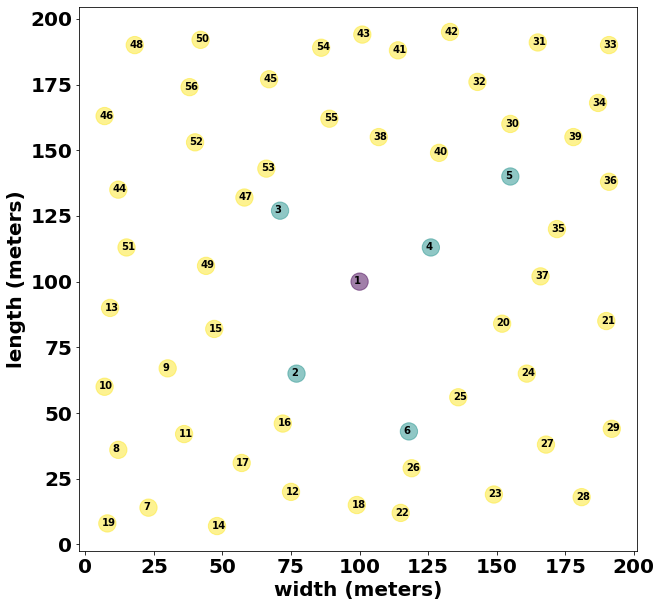

In [192]:
x =net[1]
y = net[2]
colors = [0,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]
area = (300 * np.ones(number_of_nodes))  # 0 to 15 point radii
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.xlabel("width (meters)")
plt.ylabel("length (meters)")
for i in (net[0]):
    ax.annotate(i, (net[1][i-1]-2, net[2][i-1]-1))
plt.show()

The network is composed by:
    - 1 Sink Node: responsible for receiving data from nodes in the network.
    - 5 Cluster Heads: responsible for collecting data from normal nodes in their neighborhood.
    - 50 Normal Nodes: responsible for generating packets and send them to the closest Cluster Head.

The area where the nodes are reparted is a square surface. It's side is of 200 meters.

## 2- Power consumption source in the network

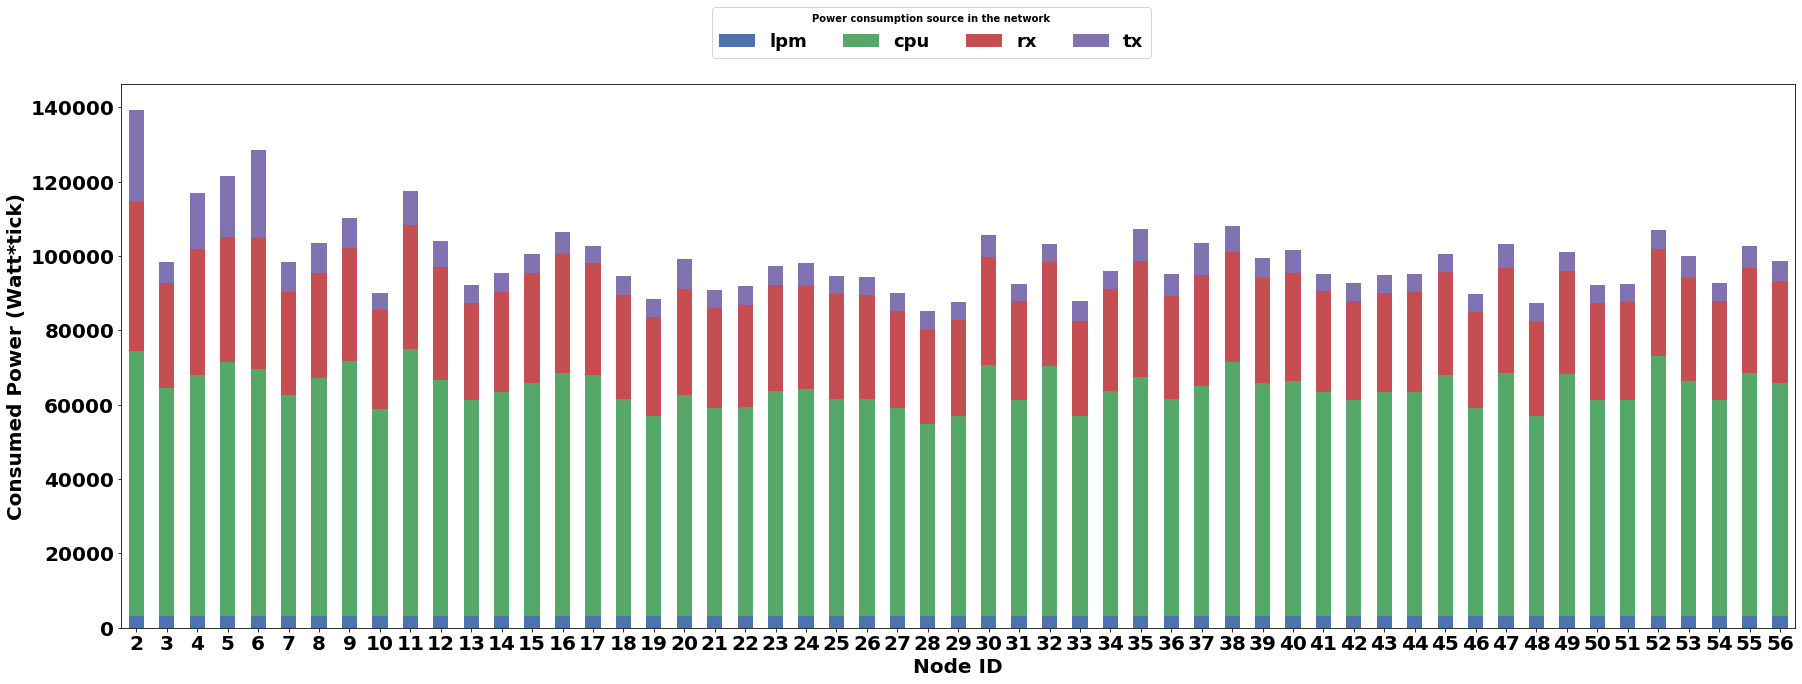

In [160]:
ctrl = pd.DataFrame(columns=['lpm', 'cpu', 'rx',"tx"])
for i in range (2,number_of_nodes+1):
    ctrl=pd.concat([ctrl,data.loc[data['ID'] == i][["lpm","cpu","rx","tx"]].dropna().mean(axis = 0).to_frame().T],ignore_index=True)

ctrl.index=np.arange(2, len(ctrl)+2)
ax=ctrl.plot.bar(stacked=True,figsize = (30, 10))
ax.legend(title='Power consumption source in the network',ncol=5, 
                loc='upper center',
                bbox_to_anchor=(0.5, 1.0),
                bbox_transform=plt.gcf().transFigure)
plt.xlabel("Node ID")
plt.ylabel("Consumed Power (Watt*tick)")
plt.xticks(rotation=0)
plt.show()

After the simulation we notice that the Cluster Heads consume more energy than Normal Nodes.
This difference is due to the dependency of Normal Nodes to Cluster Heads and because of the forwarding role of Cluster Heads.

## 3- Network total energy over time

C:\Users\21629\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\21629\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


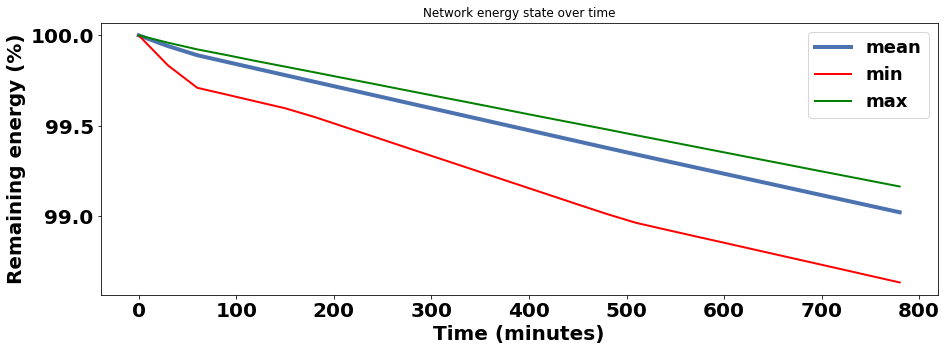

<Figure size 1296x576 with 0 Axes>

In [78]:
net_energy = pd.DataFrame(columns = ["time","mean","min","max"])

for t in range (0,sim_time+1,30):
    ts = data.loc[data['ID'] == 2][data['time'] == t][["ID","remaining energy"]].dropna()
    for i in range (3,number_of_nodes+1):
        ts=pd.concat([ts,data.loc[data['ID'] == i][data['time'] == t][["ID","remaining energy"]].dropna()])
    ts['remaining energy'] = ts['remaining energy'].div(265420800).multiply(100)
    mean=ts["remaining energy"].mean()
    min=ts["remaining energy"].min()
    max=ts["remaining energy"].max()
    net_energy = net_energy.append({"time":t,"mean":mean,"min":min,"max":max}, ignore_index=True)
    
plt.figure(figsize=(15,5))
plt.plot( 'time', 'mean', data=net_energy, marker='', markerfacecolor='blue', linewidth=4)
plt.plot( 'time', 'min', data=net_energy, marker='', color='red', linewidth=2)
plt.plot( 'time', 'max', data=net_energy, marker='', color='green', linewidth=2)
plt.legend()
plt.xlabel("Time (minutes)")
plt.ylabel("Residual energy (%)")
plt.title("Network energy state over time")
plt.figure(figsize=(18,8))
plt.show()

## 4- Nodes residual energy at a given time

Enter a time format: hh:mm, hh is hours and mm in minutes
12:30


C:\Users\21629\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\21629\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


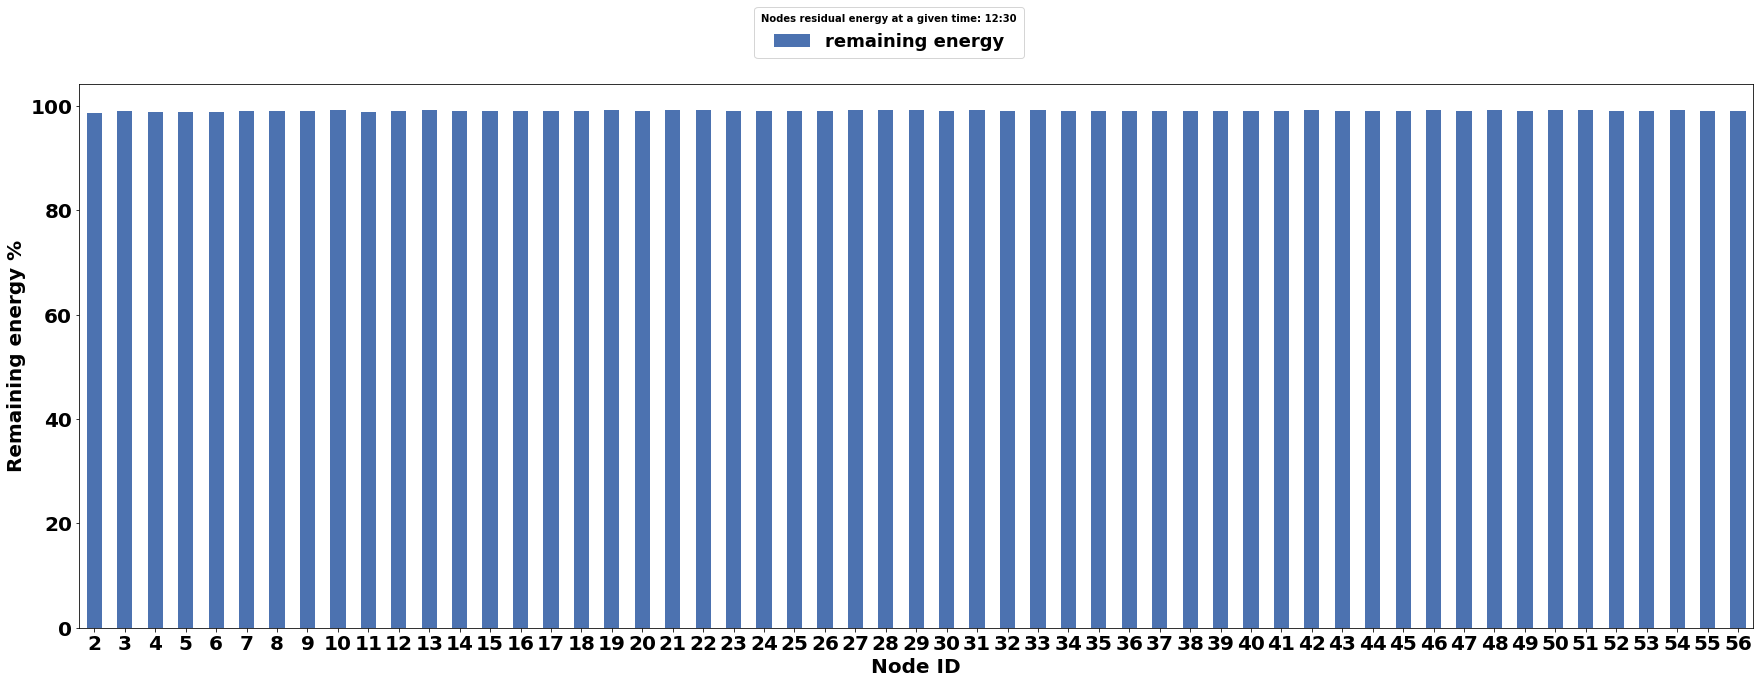

In [84]:
t=input("Enter a time format: hh:mm, hh is hours and mm in minutes\n")
time=int(t[:t.find(":")])*60 + int(t[t.find(":")+1:])
time-=time%30
ts = data.loc[data['ID'] == 2][data['time'] == time][["ID","remaining energy"]].dropna()
for i in range (3,number_of_nodes+1):
    ts=pd.concat([ts,data.loc[data['ID'] == i][data['time'] == time][["ID","remaining energy"]].dropna()])
ts['remaining energy'] = ts['remaining energy'].div(265420800).multiply(100)

ax = ts.plot.bar(x='ID', y='remaining energy',stacked=True,figsize = (30, 10))
legend=("Nodes residual energy at a given time: "+t)

ax.legend(title=legend,ncol=5, loc='upper center', bbox_to_anchor=(0.5, 1.0), bbox_transform=plt.gcf().transFigure)
plt.ylabel("Residual energy %")
plt.xlabel("Node ID")
plt.xticks(rotation=0)
plt.show()

## 5- Node residual energy over time

Enter node ID: 3


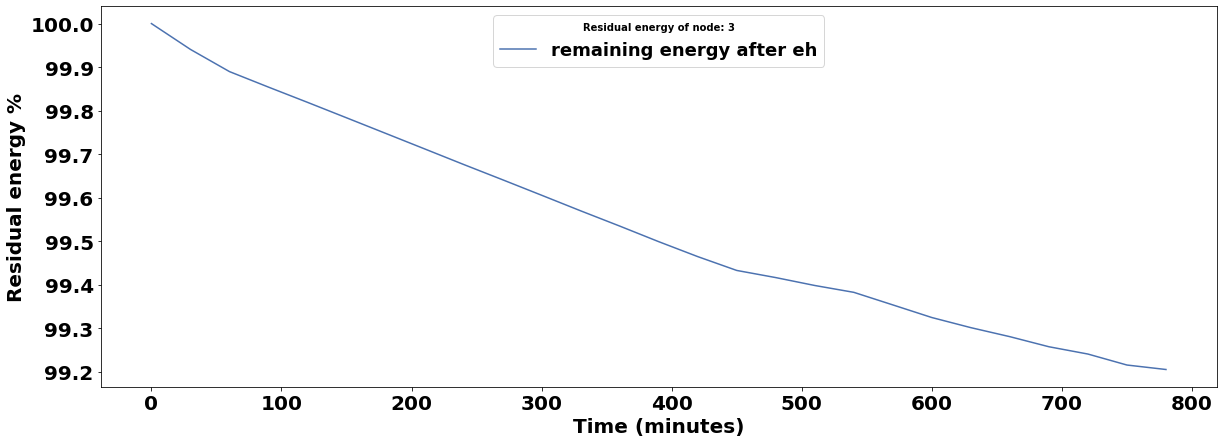

In [186]:
node_id=int(input("Enter node ID: "))
if node_id in nodes_with_eh:
    ts=data.loc[data['ID'] == node_id][["time","remaining energy after eh"]].dropna()
    ts['remaining energy after eh'] = ts['remaining energy after eh'].div(265420800).multiply(100)

    ax=ts.plot(x="time",y="remaining energy after eh",stacked=True,figsize = (20, 7))
    legend=("Residual energy of node: "+str(node_id))
    ax.legend(title=legend,ncol=5, loc='upper center')
    # plt.ylim(0,100)
    plt.ylabel("Residual energy %")
    plt.xlabel("Time (minutes)")
    plt.show()
else:

    ts=data.loc[data['ID'] == node_id][["time","remaining energy"]].dropna()
    ts['remaining energy'] = ts['remaining energy'].div(265420800).multiply(100)

    ax=ts.plot(x="time",y="remaining energy",stacked=True,figsize = (20, 7))
    legend=("Residual energy of node: "+str(node_id))
    ax.legend(title=legend,ncol=5, loc='upper center')
    # plt.ylim(0,100)
    plt.ylabel("Residual energy %")
    plt.xlabel("Time (minutes)")
    plt.show()

## 6- Comparison between Node residual energy with & without Energy Harvesting over time

Enter node ID: 2


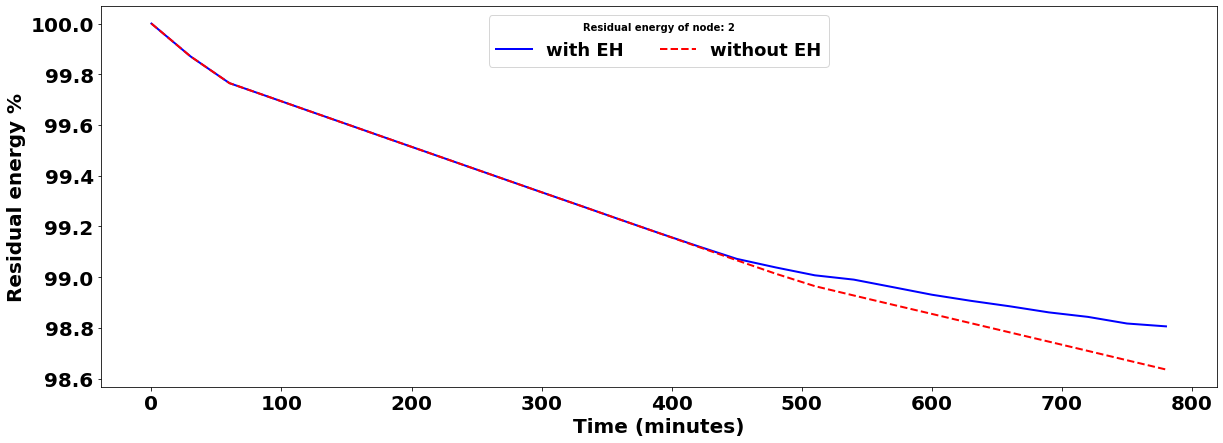

In [194]:
node_id=int(input("Enter node ID: "))
ts=data.loc[data['ID'] == node_id][["time","remaining energy","remaining energy after eh"]].dropna()
ts['remaining energy'] = ts['remaining energy'].div(265420800).multiply(100)
ts['remaining energy after eh'] = ts['remaining energy after eh'].div(265420800).multiply(100)
plt.figure(figsize=(20,7))
plt.plot( 'time', 'remaining energy after eh', data=ts, marker='', color='blue', linewidth=2, label="with EH")
plt.plot( 'time', 'remaining energy', data=ts, marker='', color='red', linewidth=2, linestyle='dashed', label="without EH")
legend=("Residual energy of node: "+str(node_id))
plt.legend(title=legend,ncol=5, loc='upper center')

plt.ylabel("Residual energy %")
plt.xlabel("Time (minutes)")
plt.show()